In [38]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import seaborn as sns
from matplotlib import pyplot as plt

from ucimlrepo import fetch_ucirepo

In [3]:
# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data
X = wine_quality.data.features
y = wine_quality.data.targets

In [7]:
# variable information
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [8]:
X.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [28]:
x_train,x_test,y_train,y_test= train_test_split(X,y,random_state=3)

In [32]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

coefficients = pd.DataFrame(regressor.coef_, columns=X.columns)


coefficients = pd.DataFrame(regressor.coef_[0], index=X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False)

,Coefficient
sulphates,0.728115
pH,0.352031
alcohol,0.273763
fixed_acidity,0.071884
residual_sugar,0.040688
free_sulfur_dioxide,0.004386
total_sulfur_dioxide,-0.002112
citric_acid,-0.154161
chlorides,-0.648144
volatile_acidity,-1.388748


In [34]:
df = pd.DataFrame(X, columns=X.columns)
df['quality'] = y

correlations = df.corr()['quality'].drop('quality')
correlations.iloc[(-correlations.abs()).argsort()]

alcohol                 0.444319
density                -0.305858
volatile_acidity       -0.265699
chlorides              -0.200666
citric_acid             0.085532
fixed_acidity          -0.076743
free_sulfur_dioxide     0.055463
total_sulfur_dioxide   -0.041385
sulphates               0.038485
residual_sugar         -0.036980
pH                      0.019506
Name: quality, dtype: float64

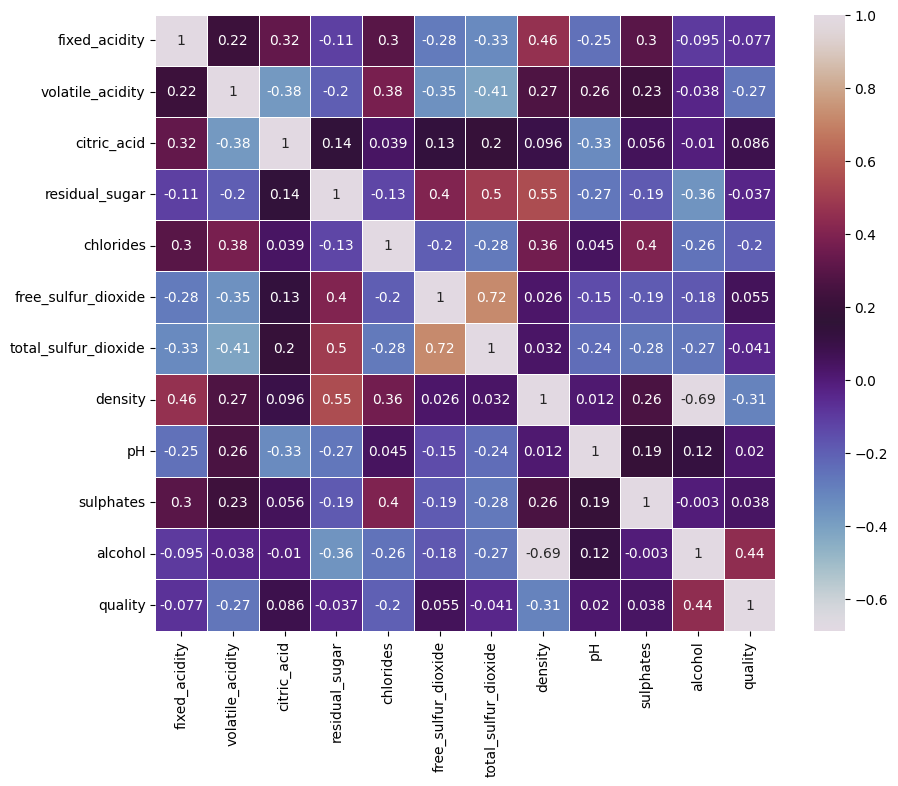

In [37]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax, cmap="twilight")
plt.show()

alcohol is the most important feature to improve quality

In [49]:
from sklearn import preprocessing, linear_model

x_train_scaled = preprocessing.StandardScaler().fit_transform(x_train)
regressor = linear_model.Lasso(alpha=0.045)
regressor.fit(x_train_scaled,y_train)

regressor.coef_

array([ 0.        , -0.18528554,  0.        ,  0.01165417, -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.02855469,
        0.33719829])

In [52]:
coefficients=pd.DataFrame(regressor.coef_,X.columns)
coefficients

,0
fixed_acidity,0.000000
volatile_acidity,-0.185286
citric_acid,0.000000
residual_sugar,0.011654
chlorides,-0.000000
free_sulfur_dioxide,0.000000
total_sulfur_dioxide,-0.000000
density,0.000000
pH,0.000000
sulphates,0.028555


In [53]:
coefficients.columns=['Coefficient']

In [54]:
coefficients.sort_values(by='Coefficient', ascending=False)

,Coefficient
alcohol,0.337198
sulphates,0.028555
residual_sugar,0.011654
total_sulfur_dioxide,-0.000000
citric_acid,0.000000
fixed_acidity,0.000000
chlorides,-0.000000
pH,0.000000
free_sulfur_dioxide,0.000000
density,0.000000
